In [156]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import imblearn
from imblearn.over_sampling import SMOTE
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import plot_confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, StratifiedKFold,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


READING OF FILE

In [157]:
file_csv =("C:/Users/eve10/Downloads/Alloy Composition Dr. Zeng_dede.csv")
df = pd.read_csv(file_csv, encoding= 'unicode_escape',header=0)


In [158]:
df.head(10)

,Si,Zn,Fe,Re,Cu,Mn,Hf,Mg,Ti,Zr,...,Nb,Ta,Ce,Sn,Cb,Li,La,Se,Al,Printability
0,10.00,0.0,0.275,0.0,0.025,0.225,0.0,0.325,0.075,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,89.05,1
1,10.98,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,84.12,1
2,9.50,0.0,0.275,0.0,0.025,0.225,0.0,0.300,0.075,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,84.50,1
3,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,...,0.0,90.0,0.0,0,0,0.0,0.0,0.0,0.00,1
4,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,...,0.0,80.0,0.0,0,0,0.0,0.0,0.0,0.00,1
5,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.0,...,0.0,60.0,0.0,0,0,0.0,0.0,0.0,0.00,1
6,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,50.000,0.0,...,0.0,50.0,0.0,0,0,0.0,0.0,0.0,0.00,1
7,0.00,0.0,0.183,0.0,0.000,0.000,0.0,0.000,89.722,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,6.14,1
8,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,92.100,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.90,1
9,0.00,0.0,0.000,0.0,0.000,0.000,0.0,0.000,95.200,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,3.00,1


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Si            196 non-null    float64
 1   Zn            196 non-null    float64
 2   Fe            196 non-null    float64
 3   Re            196 non-null    float64
 4   Cu            196 non-null    float64
 5   Mn            196 non-null    float64
 6   Hf            196 non-null    float64
 7   Mg            196 non-null    float64
 8   Ti            196 non-null    float64
 9   Zr            196 non-null    float64
 10  Sc            196 non-null    float64
 11  Ni            196 non-null    float64
 12  Na            196 non-null    float64
 13  P             196 non-null    float64
 14  Er            196 non-null    float64
 15  C             196 non-null    float64
 16  V             196 non-null    float64
 17  Cr            196 non-null    float64
 18  Mo            196 non-null    

PEARSON CORRELATION HEATMAP FOR STATISTICAL MODEL

Text(0.5, 1.0, 'Multi-Collinearity of Alloy Attributes')

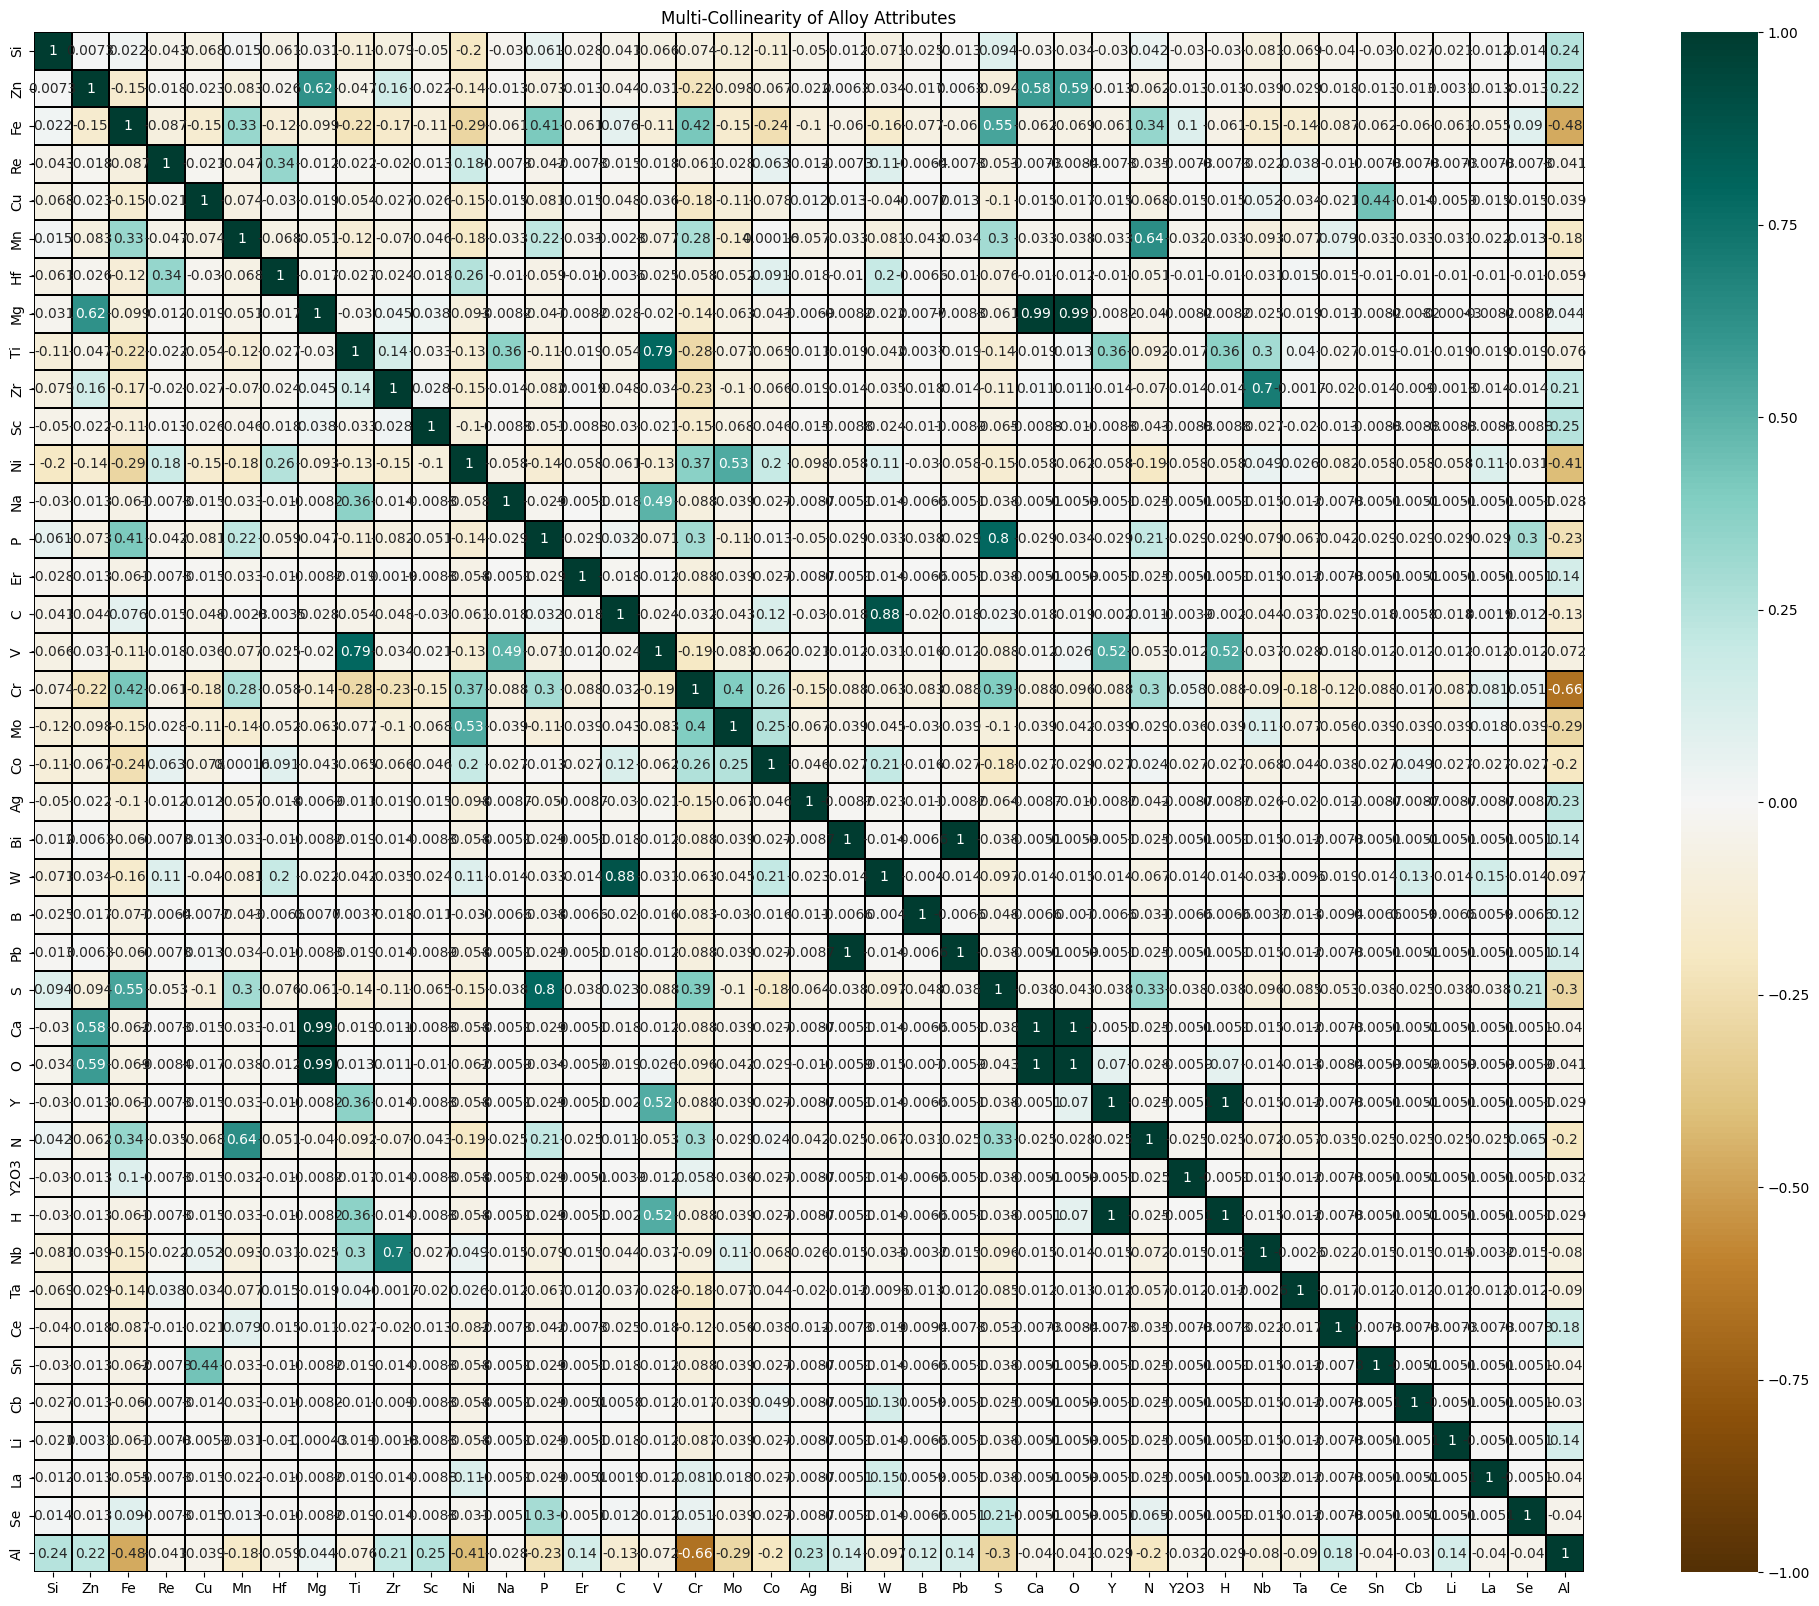

In [170]:
# check Multi-Collinearity
data=df.drop(['Printability'], axis=1)
kwargs = {'alpha':1, 'linecolor':'k','rasterized':False, 'edgecolor':'w', 'capstyle':'projecting',}
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(),vmin=-1,center=0, cmap="BrBG",linewidth=0.2, annot=True, **kwargs)
ax.set_title("Multi-Collinearity of Alloy Attributes")

NORMALIZATION OF DATA 

In [171]:
# prepare data for normalization
# Normalise training data
target_column = ['Printability']
# predictors = list(set(list(df.columns))-set(target_column))
# df[predictors] = df[predictors]/df[predictors].max()
# df.describe()

normalized_arr = StandardScaler()
normalized = normalized_arr.fit_transform(data)

DEFINING SAMPLE FEATURES AND CLASS

In [172]:
# get features and target from dataframe
X = normalized
y = df[target_column].values. ravel()

SPLITING OF DATA INTO TRAINING AND TESTING SETS

In [173]:
  
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=10, test_size=0.3)


DATA OVERSAMPLING METHOD

In [174]:
sm= SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [175]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (140, 41)
After OverSampling, the shape of train_y: (140,) 

After OverSampling, counts of label '1': 70
After OverSampling, counts of label '0': 70


GAUSSIANBINOMIAL CLASSIFIER

In [176]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gnb,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1,
                           verbose=1,
                           scoring="accuracy")

grid_search.fit(X_train_res, y_train_res)
gnb_best = grid_search.best_estimator_


Fitting 4 folds for each of 9 candidates, totalling 36 fits


In [177]:
y_predictions =gnb_best.predict(X_test)

In [178]:
# Measuring model's accuracy
score = accuracy_score(y_predictions, y_test)
print(score)

0.7457627118644068


In [179]:
# print classification report
print("Recall score is:", recall_score(y_test, y_predictions))
print("Precision score is:", precision_score(y_test, y_predictions))


Recall score is: 0.6857142857142857
Precision score is: 0.8571428571428571


[[20  4]
 [11 24]]


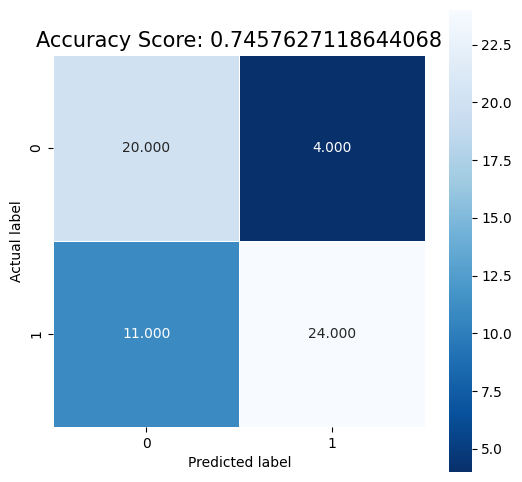

In [180]:
# confusion matrix describe the performance of a classification model
confusion_matrix= metrics.confusion_matrix(y_test, y_predictions)
print(confusion_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

LOGISTIC REGRESSION CLASSIFER

In [181]:
# logistic regression model 
# instantiation of the Model
logisticRegr = linear_model.LogisticRegression()

# Training the model on the data, storing the information learned from the data
logisticRegr.fit(X_train_res, y_train_res)

# Predict labels for new data
# Use information the model learned during the model training process
y_predictions = logisticRegr.predict(X_test)

In [182]:
# Measuring model's accuracy
score = accuracy_score(y_predictions, y_test)
print(score)

0.8305084745762712


In [183]:
# print classification report
print("Recall score is: ",recall_score(y_test, y_predictions))
print("Precision score is: ",precision_score(y_test, y_predictions))


Recall score is:  0.8
Precision score is:  0.9032258064516129


[[21  3]
 [ 7 28]]


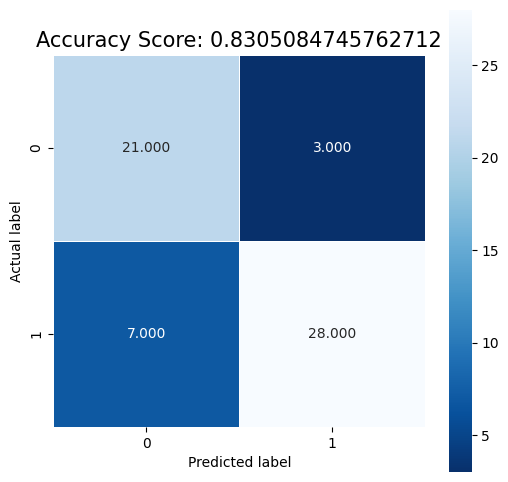

In [184]:
# confusion matrix describe the performance of a classification model

con_matrix= metrics.confusion_matrix(y_test, y_predictions)
print(con_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

SUPPORT VECTOR MACHINE

In [185]:
# training the kernel SVM model
classifier = SVC(kernel = 'rbf', random_state = 10,gamma=2, C=10) # creat model's object
classifier.fit(X_train_res, y_train_res)

# predicting the test set 
y_predictions = classifier.predict(X_test)

In [186]:
score = accuracy_score(y_predictions, y_test)
print(score)

0.847457627118644


In [187]:
# print classification report
print("Recall score is:", recall_score(y_test, y_predictions))
print("Precision score is:", precision_score(y_test, y_predictions))

Recall score is: 1.0
Precision score is: 0.7954545454545454


[[15  9]
 [ 0 35]]


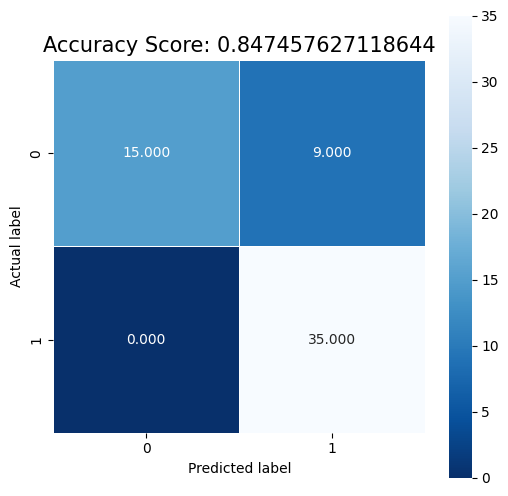

In [188]:
# confusion matrix describe the performance of a classification model

con_matrix= metrics.confusion_matrix(y_test, y_predictions)
print(con_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

EXTREME GRADIENT BOOSTER

In [189]:
# XGBClassifier model
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'lambda': 20,
            'learning_rate': 0.5,
            'n_estimators':100
        }
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=20, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [190]:
# alternatively view the parameters of the xgb trained model
print(xgb_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=20, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)


In [191]:
# make predictions on test data
y_predictions = xgb_clf.predict(X_test)

In [192]:
# Measuring model's accuracy
score = accuracy_score(y_predictions, y_test)
print(score)

0.9152542372881356


In [193]:
# print classification report
print("Recall score : ",recall_score(y_test, y_predictions))
print("Precision score : ",precision_score(y_test, y_predictions))

Recall score :  0.9142857142857143
Precision score :  0.9411764705882353


[[22  2]
 [ 3 32]]


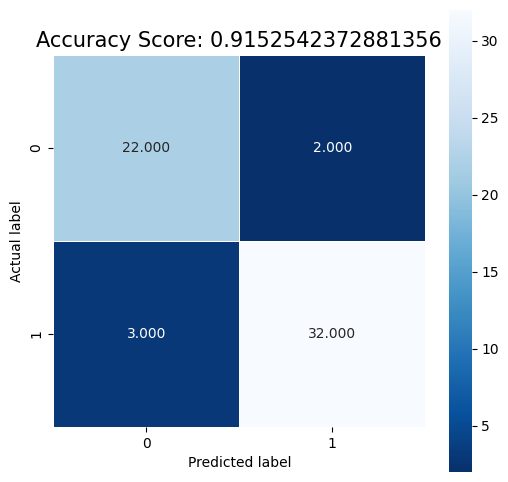

In [194]:
con_matrix= metrics.confusion_matrix(y_test, y_predictions)
print(con_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

GAUSSIAN PROCESS CLASSIFER

In [145]:
# gaussianprocess Classifier model
# instantiate gaussianclassifier model
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=42,n_restarts_optimizer=0, max_iter_predict=100).fit(X_train_res, y_train_res)

In [146]:
# make predictions on test data
y_predictions = gpc.predict(X_test)

In [147]:
# Measuring model's accuracy
score = accuracy_score(y_predictions, y_test)
print(score)

0.864406779661017


In [148]:
# print classification report
print("Recall score is: ",recall_score(y_test, y_predictions))
print("Precision score is: ",precision_score(y_test, y_predictions))

Recall score is:  0.8285714285714286
Precision score is:  0.9354838709677419


[[22  2]
 [ 6 29]]


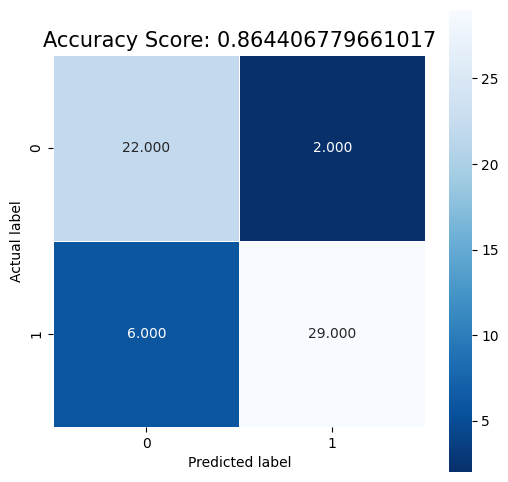

In [149]:
con_matrix= metrics.confusion_matrix(y_test, y_predictions)
print(con_matrix)
plt.figure(figsize=(6,6))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

In [150]:
classifier_rf = RandomForestClassifier(random_state=10, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

Validation of model

In [151]:
file_csv_new =(r"C:\Users\eve10\Dropbox\Documents\new_valid_set.csv")
df = pd.read_csv(file_csv_new, encoding= 'unicode_escape',header=0)
df.head(10)

,Si,Zn,Fe,Re,Cu,Mn,Hf,Mg,Ti,Zr,...,H,Nb,Ta,Ce,Sn,Cb,Li,La,Se,Al
0,0,0,0.000,0,0,0.0,0,0,2.500,0.000,...,0,0.000,0.000,0,0,0,0,0,0,1.500
1,0,0,0.000,0,0,0.0,0,0,3.900,0.000,...,0,0.000,0.000,0,0,0,0,0,0,1.500
2,0,0,0.000,0,0,0.2,0,0,2.500,0.045,...,0,0.000,0.000,0,0,0,0,0,0,2.500
3,8,0,0.185,0,0,0.0,0,0,3.546,0.093,...,0,0.963,1.269,0,0,0,0,0,0,1.713


In [152]:
normalized_arr_new = StandardScaler()
normalized_new = normalized_arr_new.fit_transform(df)
X_new=normalized_new

In [153]:
y_predictions =xgb_clf.predict(X_new)
y_predictions 

array([1, 1, 0, 0])

Fitting 4 folds for each of 117600 candidates, totalling 470400 fits


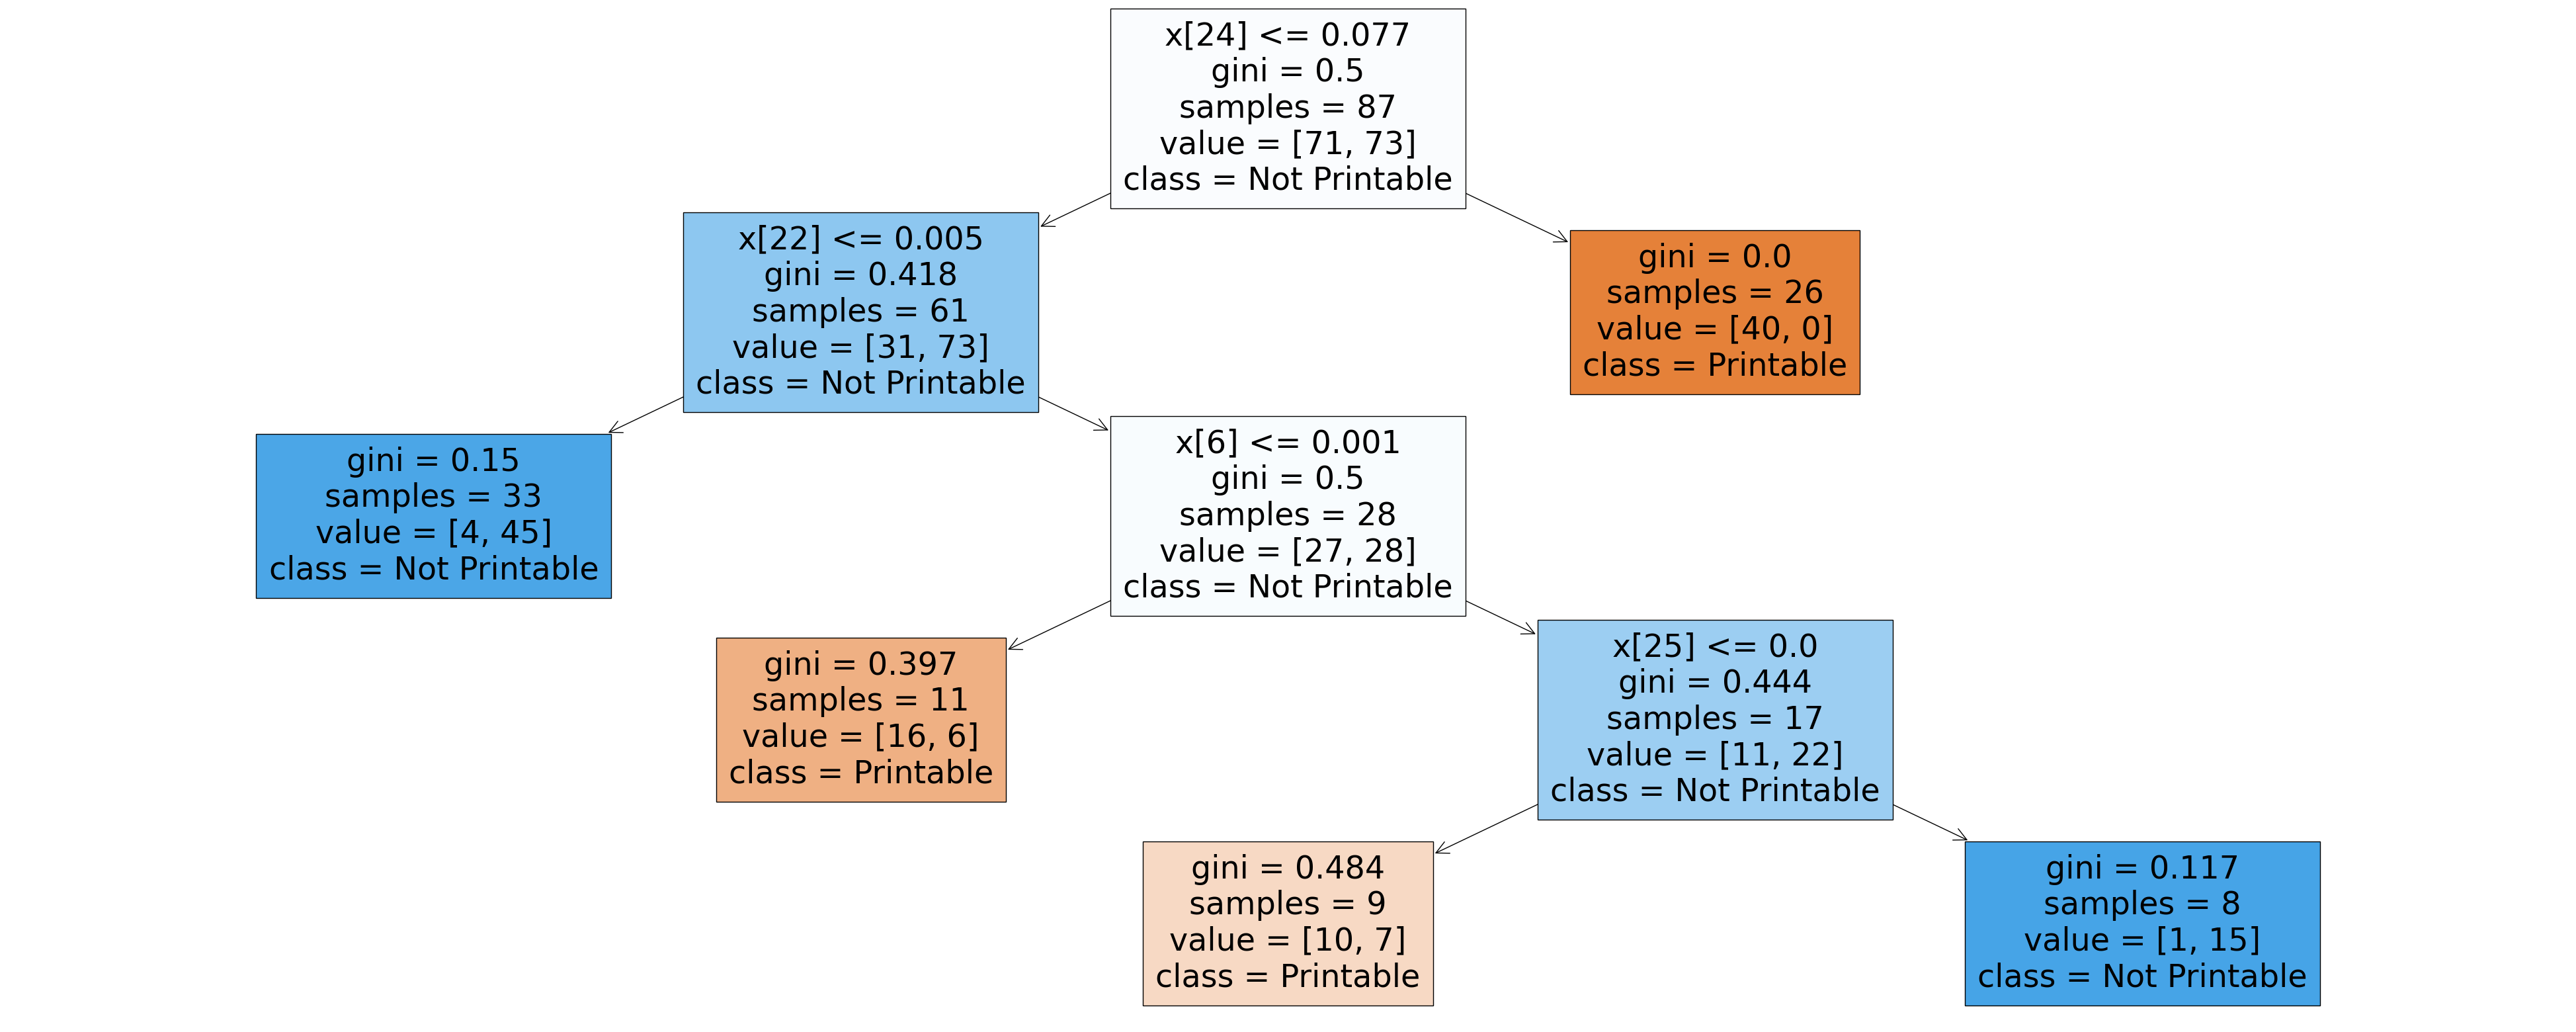

In [36]:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# params = {
#     'max_depth': list(range(100, 5, -4)),
#     'min_samples_leaf': list(range(300, 5, -6)),
#     'n_estimators': list(range(200, 5, -2))
# }


# from sklearn.model_selection import GridSearchCV

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=rf,
#                            param_grid=params,
#                            cv=4,
#                            n_jobs=-1,
#                            verbose=1,
#                            scoring="accuracy")

# grid_search.fit(X_train_res, y_train_res)
# rf_best = grid_search.best_estimator_

# plt.figure(figsize=(50, 20))
# plot_tree(rf_best.estimators_[5],
#           class_names=['Printable', 'Not Printable'],
#           filled=True)
# plt.show()


In [37]:
#y_predictions = rf_best.predict(X_test)

In [38]:
#y_predictions

In [39]:
# Measuring model's accuracy
# score = accuracy_score(y_predictions, y_test)
# print(score)

0.8103448275862069


In [40]:
# print classification report
# print("Recall score is: ",recall_score(y_test, y_predictions))
# print("Precision score is: ",precision_score(y_test, y_predictions))

Recall score is:  0.9333333333333333
Precision score is:  0.7567567567567568


[[19  9]
 [ 2 28]]


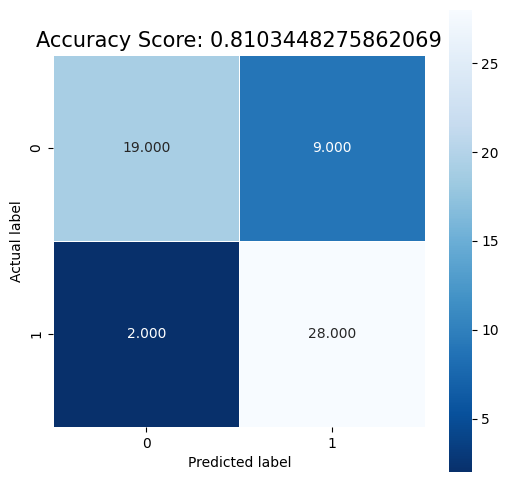

In [41]:
# con_matrix= metrics.confusion_matrix(y_test, y_predictions)
# print(con_matrix)
# plt.figure(figsize=(6,6))
# sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(score)
# plt.title(all_sample_title, size = 15)
# plt.show()